# Predefined TFBS

This notebook shows how to analyze the TF-co-occurrences of predefined TFBS. The data used here is obtained from ENCODE.

## Setup a CombObj

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj()

## Read TFBS from .bed-file

In [2]:
C.TFBS_from_bed("../data/GM12878_hg38_chr1_TFBS.bed")

INFO: Reading sites from '../data/GM12878_hg38_chr1_TFBS.bed'...
INFO: Read 205199 sites (comprising 118 unique TFs)


Now, the CombObj contains the .TFBS variable holding all TFBS to use:

In [3]:
C.TFBS[:10]

[['chr1', 804936, 804937, 'BHLHE40', '1000', '.'],
 ['chr1', 805453, 805454, 'MEF2B', '1000', '.'],
 ['chr1', 826821, 826822, 'TRIM22', '549', '.'],
 ['chr1', 827294, 827295, 'GATAD2B', '777', '.'],
 ['chr1', 827299, 827300, 'MEF2B', '820', '.'],
 ['chr1', 827303, 827304, 'POLR2AphosphoS5', '911', '.'],
 ['chr1', 827305, 827306, 'PBX3', '699', '.'],
 ['chr1', 827391, 827392, 'E2F8', '939', '.'],
 ['chr1', 827409, 827410, 'KLF5', '597', '.'],
 ['chr1', 827414, 827415, 'NKRF', '1000', '.']]

## Count co-occurring TFs

In [4]:
C.count_within() #counts co-occurring TFs with standard parameters

INFO: Counting co-occurring TFs from .TFBS...
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs


## Perform market basket analysis

In [5]:
C.market_basket()

INFO: Market basket analysis is done! Results are found in .rules


In [6]:
C.rules.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine
0,BATF,JUNB,1951,3295,3060,205199,0.009508,0.016058,0.014912,0.592109,39.705957,0.614425
1,JUNB,BATF,1951,3060,3295,205199,0.009508,0.014912,0.016058,0.637582,39.705957,0.614425
2,CTCF,ZNF143,2607,4845,4166,205199,0.012705,0.023611,0.020302,0.538080,26.503500,0.580276
3,ZNF143,CTCF,2607,4166,4845,205199,0.012705,0.020302,0.023611,0.625780,26.503500,0.580276
4,HCFC1,SIX5,401,948,528,205199,0.001954,0.004620,0.002573,0.422996,164.390741,0.566791


## Visualize results

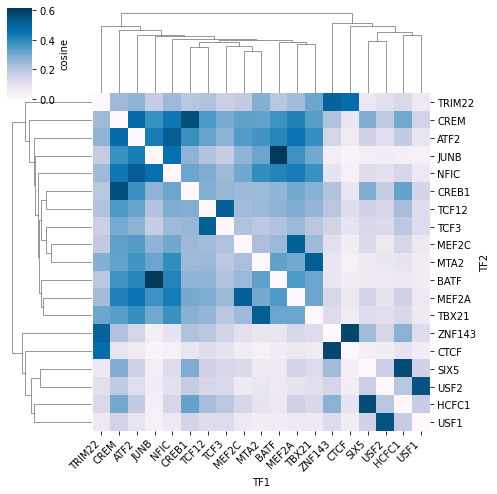

In [7]:
_ = C.plot_heatmap()

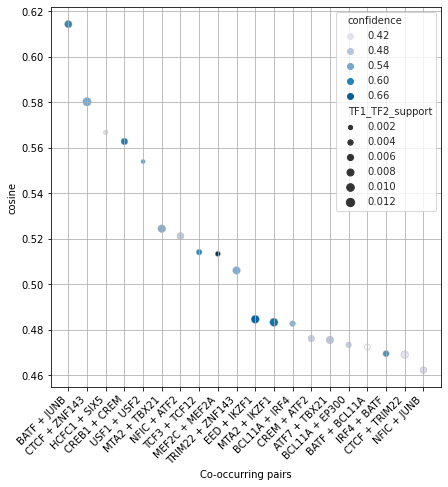

In [8]:
_ = C.plot_bubble()

## Save CombObj to a pickle object

In [9]:
C.to_pickle("../data/GM12878.pkl")